<a href="https://colab.research.google.com/github/Ajithkumar9047/cancer-prediction/blob/main/cancer_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Required Library



In [ ]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# remove warings and set values

In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')
# rcParams
plt.rcParams['figure.figsize']=[15,8]
#'exponential' to float
np.set_printoptions(suppress = True)
pd.options.display.float_format = '{:.2f}'.format

# Load Dataset

In [ ]:
cancer=pd.read_csv("cancer.csv")
cancer.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.00,0.12,0.28,0.30,0.15,...,17.33,184.60,2019.00,0.16,0.67,0.71,0.27,0.46,0.12,NaN
1,842517,M,20.57,17.77,132.90,1326.00,0.08,0.08,0.09,0.07,...,23.41,158.80,1956.00,0.12,0.19,0.24,0.19,0.28,0.09,NaN
2,84300903,M,19.69,21.25,130.00,1203.00,0.11,0.16,0.20,0.13,...,25.53,152.50,1709.00,0.14,0.42,0.45,0.24,0.36,0.09,NaN
3,84348301,M,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,...,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17,NaN
4,84358402,M,20.29,14.34,135.10,1297.00,0.10,0.13,0.20,0.10,...,16.67,152.20,1575.00,0.14,0.20,0.40,0.16,0.24,0.08,NaN
5,843786,M,12.45,15.70,82.57,477.10,0.13,0.17,0.16,0.08,...,23.75,103.40,741.60,0.18,0.52,0.54,0.17,0.40,0.12,NaN
6,844359,M,18.25,19.98,119.60,1040.00,0.09,0.11,0.11,0.07,...,27.66,153.20,1606.00,0.14,0.26,0.38,0.19,0.31,0.08,NaN
7,84458202,M,13.71,20.83,90.20,577.90,0.12,0.16,0.09,0.06,...,28.14,110.60,897.00,0.17,0.37,0.27,0.16,0.32,0.12,NaN
8,844981,M,13.00,21.82,87.50,519.80,0.13,0.19,0.19,0.09,...,30.73,106.20,739.30,0.17,0.54,0.54,0.21,0.44,0.11,NaN
9,84501001,M,12.46,24.04,83.97,475.90,0.12,0.24,0.23,0.09,...,40.68,97.65,711.40,0.19,1.06,1.10,0.22,0.44,0.21,NaN


# Data Pre-processing

In [ ]:
cancer.drop('id', axis = 1, inplace = True)
cancer.drop('Unnamed: 32', axis = 1, inplace = True)
cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.00,0.12,0.28,0.30,0.15,0.24,...,25.38,17.33,184.60,2019.00,0.16,0.67,0.71,0.27,0.46,0.12
1,M,20.57,17.77,132.90,1326.00,0.08,0.08,0.09,0.07,0.18,...,24.99,23.41,158.80,1956.00,0.12,0.19,0.24,0.19,0.28,0.09
2,M,19.69,21.25,130.00,1203.00,0.11,0.16,0.20,0.13,0.21,...,23.57,25.53,152.50,1709.00,0.14,0.42,0.45,0.24,0.36,0.09
3,M,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,0.26,...,14.91,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17
4,M,20.29,14.34,135.10,1297.00,0.10,0.13,0.20,0.10,0.18,...,22.54,16.67,152.20,1575.00,0.14,0.20,0.40,0.16,0.24,0.08


In [ ]:
cancer.shape

(569, 31)

In [ ]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
cancer.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [ ]:
cancer['diagnosis']=cancer['diagnosis'].replace({"B":0,"M":1})
cancer

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.00,0.12,0.28,0.30,0.15,0.24,...,25.38,17.33,184.60,2019.00,0.16,0.67,0.71,0.27,0.46,0.12
1,1,20.57,17.77,132.90,1326.00,0.08,0.08,0.09,0.07,0.18,...,24.99,23.41,158.80,1956.00,0.12,0.19,0.24,0.19,0.28,0.09
2,1,19.69,21.25,130.00,1203.00,0.11,0.16,0.20,0.13,0.21,...,23.57,25.53,152.50,1709.00,0.14,0.42,0.45,0.24,0.36,0.09
3,1,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,0.26,...,14.91,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17
4,1,20.29,14.34,135.10,1297.00,0.10,0.13,0.20,0.10,0.18,...,22.54,16.67,152.20,1575.00,0.14,0.20,0.40,0.16,0.24,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.00,0.11,0.12,0.24,0.14,0.17,...,25.45,26.40,166.10,2027.00,0.14,0.21,0.41,0.22,0.21,0.07
565,1,20.13,28.25,131.20,1261.00,0.10,0.10,0.14,0.10,0.18,...,23.69,38.25,155.00,1731.00,0.12,0.19,0.32,0.16,0.26,0.07
566,1,16.60,28.08,108.30,858.10,0.08,0.10,0.09,0.05,0.16,...,18.98,34.12,126.70,1124.00,0.11,0.31,0.34,0.14,0.22,0.08
567,1,20.60,29.33,140.10,1265.00,0.12,0.28,0.35,0.15,0.24,...,25.74,39.42,184.60,1821.00,0.17,0.87,0.94,0.27,0.41,0.12


In [ ]:
cancer.describe() 

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,...,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00
mean,0.37,14.13,19.29,91.97,654.89,0.10,0.10,0.09,0.05,0.18,...,16.27,25.68,107.26,880.58,0.13,0.25,0.27,0.11,0.29,0.08
std,0.48,3.52,4.30,24.30,351.91,0.01,0.05,0.08,0.04,0.03,...,4.83,6.15,33.60,569.36,0.02,0.16,0.21,0.07,0.06,0.02
min,0.00,6.98,9.71,43.79,143.50,0.05,0.02,0.00,0.00,0.11,...,7.93,12.02,50.41,185.20,0.07,0.03,0.00,0.00,0.16,0.06
25%,0.00,11.70,16.17,75.17,420.30,0.09,0.06,0.03,0.02,0.16,...,13.01,21.08,84.11,515.30,0.12,0.15,0.11,0.06,0.25,0.07
50%,0.00,13.37,18.84,86.24,551.10,0.10,0.09,0.06,0.03,0.18,...,14.97,25.41,97.66,686.50,0.13,0.21,0.23,0.10,0.28,0.08
75%,1.00,15.78,21.80,104.10,782.70,0.11,0.13,0.13,0.07,0.20,...,18.79,29.72,125.40,1084.00,0.15,0.34,0.38,0.16,0.32,0.09
max,1.00,28.11,39.28,188.50,2501.00,0.16,0.35,0.43,0.20,0.30,...,36.04,49.54,251.20,4254.00,0.22,1.06,1.25,0.29,0.66,0.21


# Data visualization

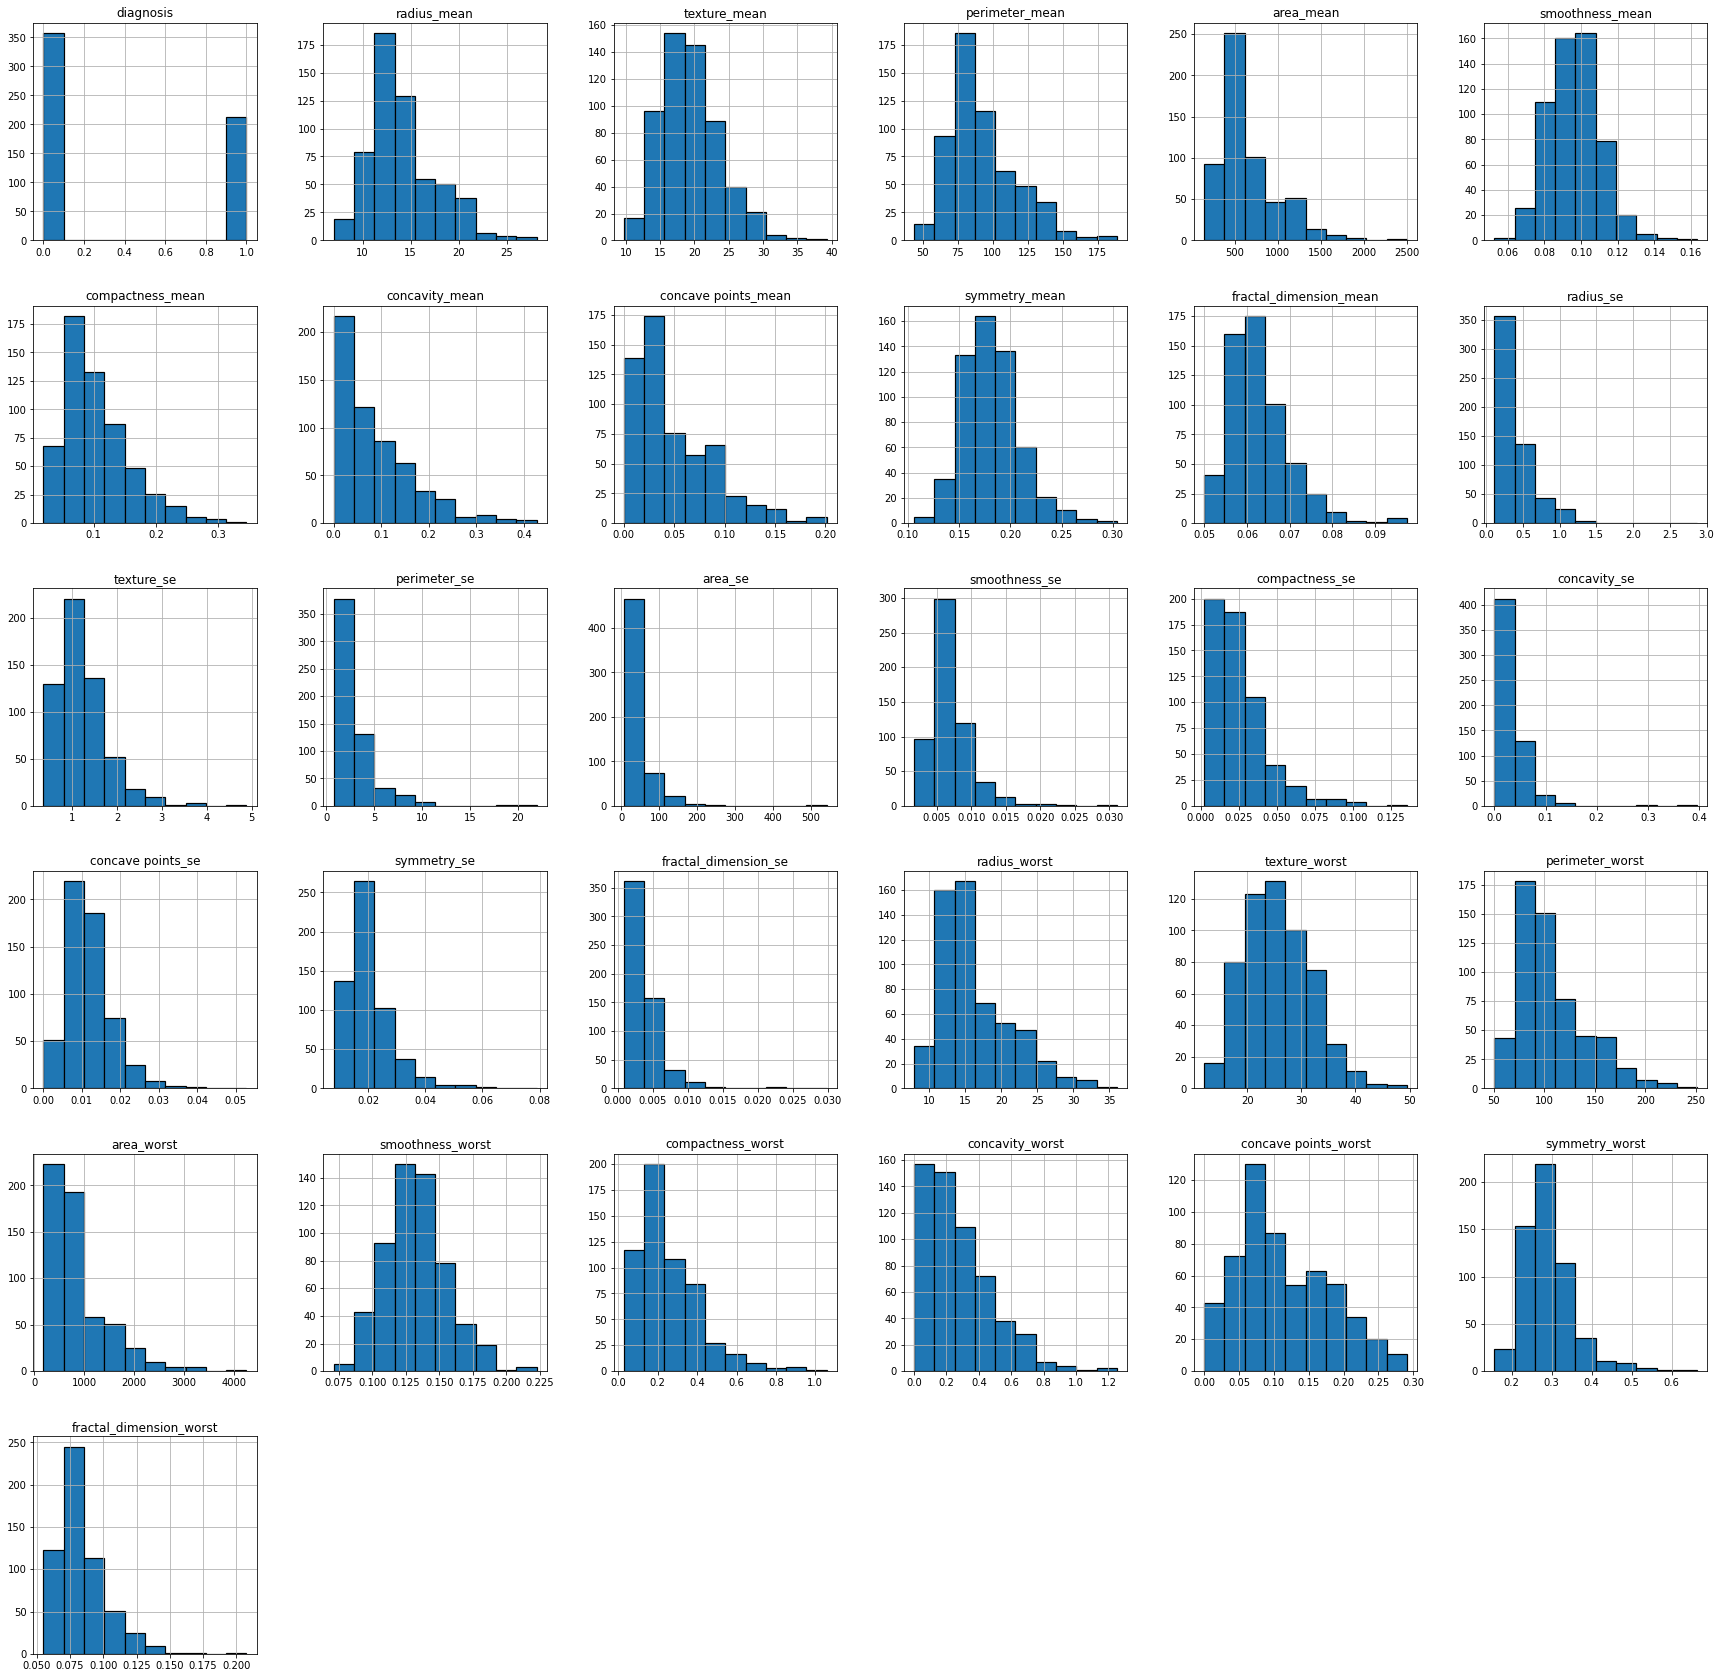

In [ ]:
cancer.hist(edgecolor = 'black', linewidth = 1.2)
fig = plt.gcf()
fig.set_size_inches(30,30)
plt.show()

In [ ]:
mean=cancer[['diagnosis','radius_mean','texture_mean','perimeter_mean', 'area_mean','smoothness_mean','compactness_mean',"concave points_mean",
                 'concavity_mean','symmetry_mean','fractal_dimension_mean']]
mean

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concave points_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
0,1,17.99,10.38,122.80,1001.00,0.12,0.28,0.15,0.30,0.24,0.08
1,1,20.57,17.77,132.90,1326.00,0.08,0.08,0.07,0.09,0.18,0.06
2,1,19.69,21.25,130.00,1203.00,0.11,0.16,0.13,0.20,0.21,0.06
3,1,11.42,20.38,77.58,386.10,0.14,0.28,0.11,0.24,0.26,0.10
4,1,20.29,14.34,135.10,1297.00,0.10,0.13,0.10,0.20,0.18,0.06
...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.00,0.11,0.12,0.14,0.24,0.17,0.06
565,1,20.13,28.25,131.20,1261.00,0.10,0.10,0.10,0.14,0.18,0.06
566,1,16.60,28.08,108.30,858.10,0.08,0.10,0.05,0.09,0.16,0.06
567,1,20.60,29.33,140.10,1265.00,0.12,0.28,0.15,0.35,0.24,0.07


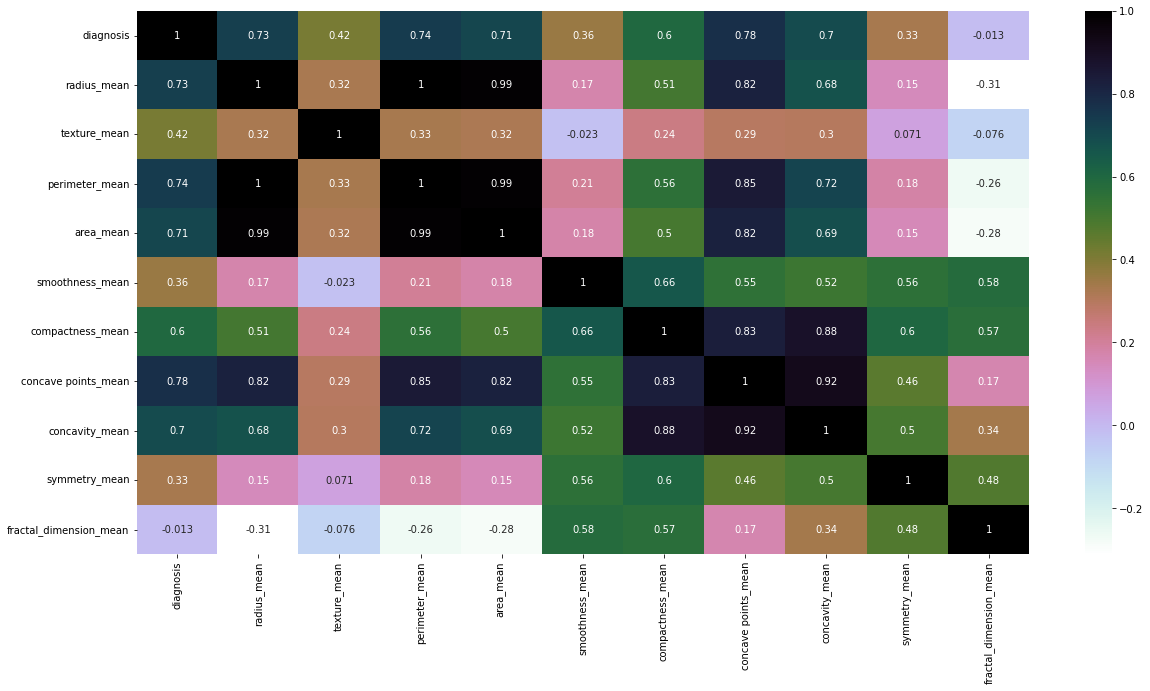

In [ ]:
plt.figure(figsize= (20,10))
sns.heatmap(mean.corr(),  annot = True,cmap= "cubehelix_r")
plt.show()

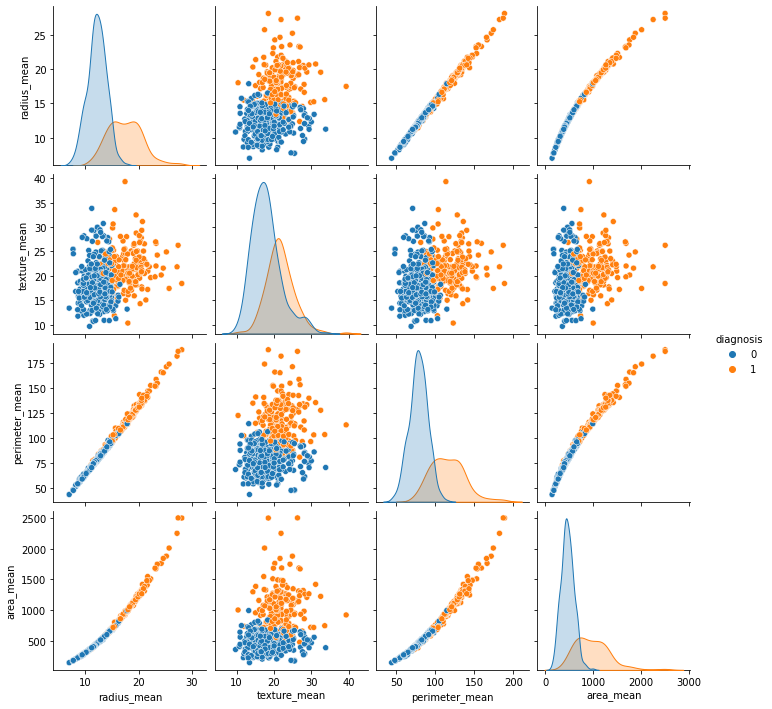

In [ ]:
sns.pairplot(cancer.iloc[:,0:5],hue='diagnosis')

# OBSERVATION:
     Following the heatmap to identify the most correlation of the dataset can be visualized.
     In this dataset of 'radius_mean','perimeter_mean','area_mean','compactness_mean','concave points_mean' has more correlation between them.
     And the remaining of texture_radius,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean has less correlation.

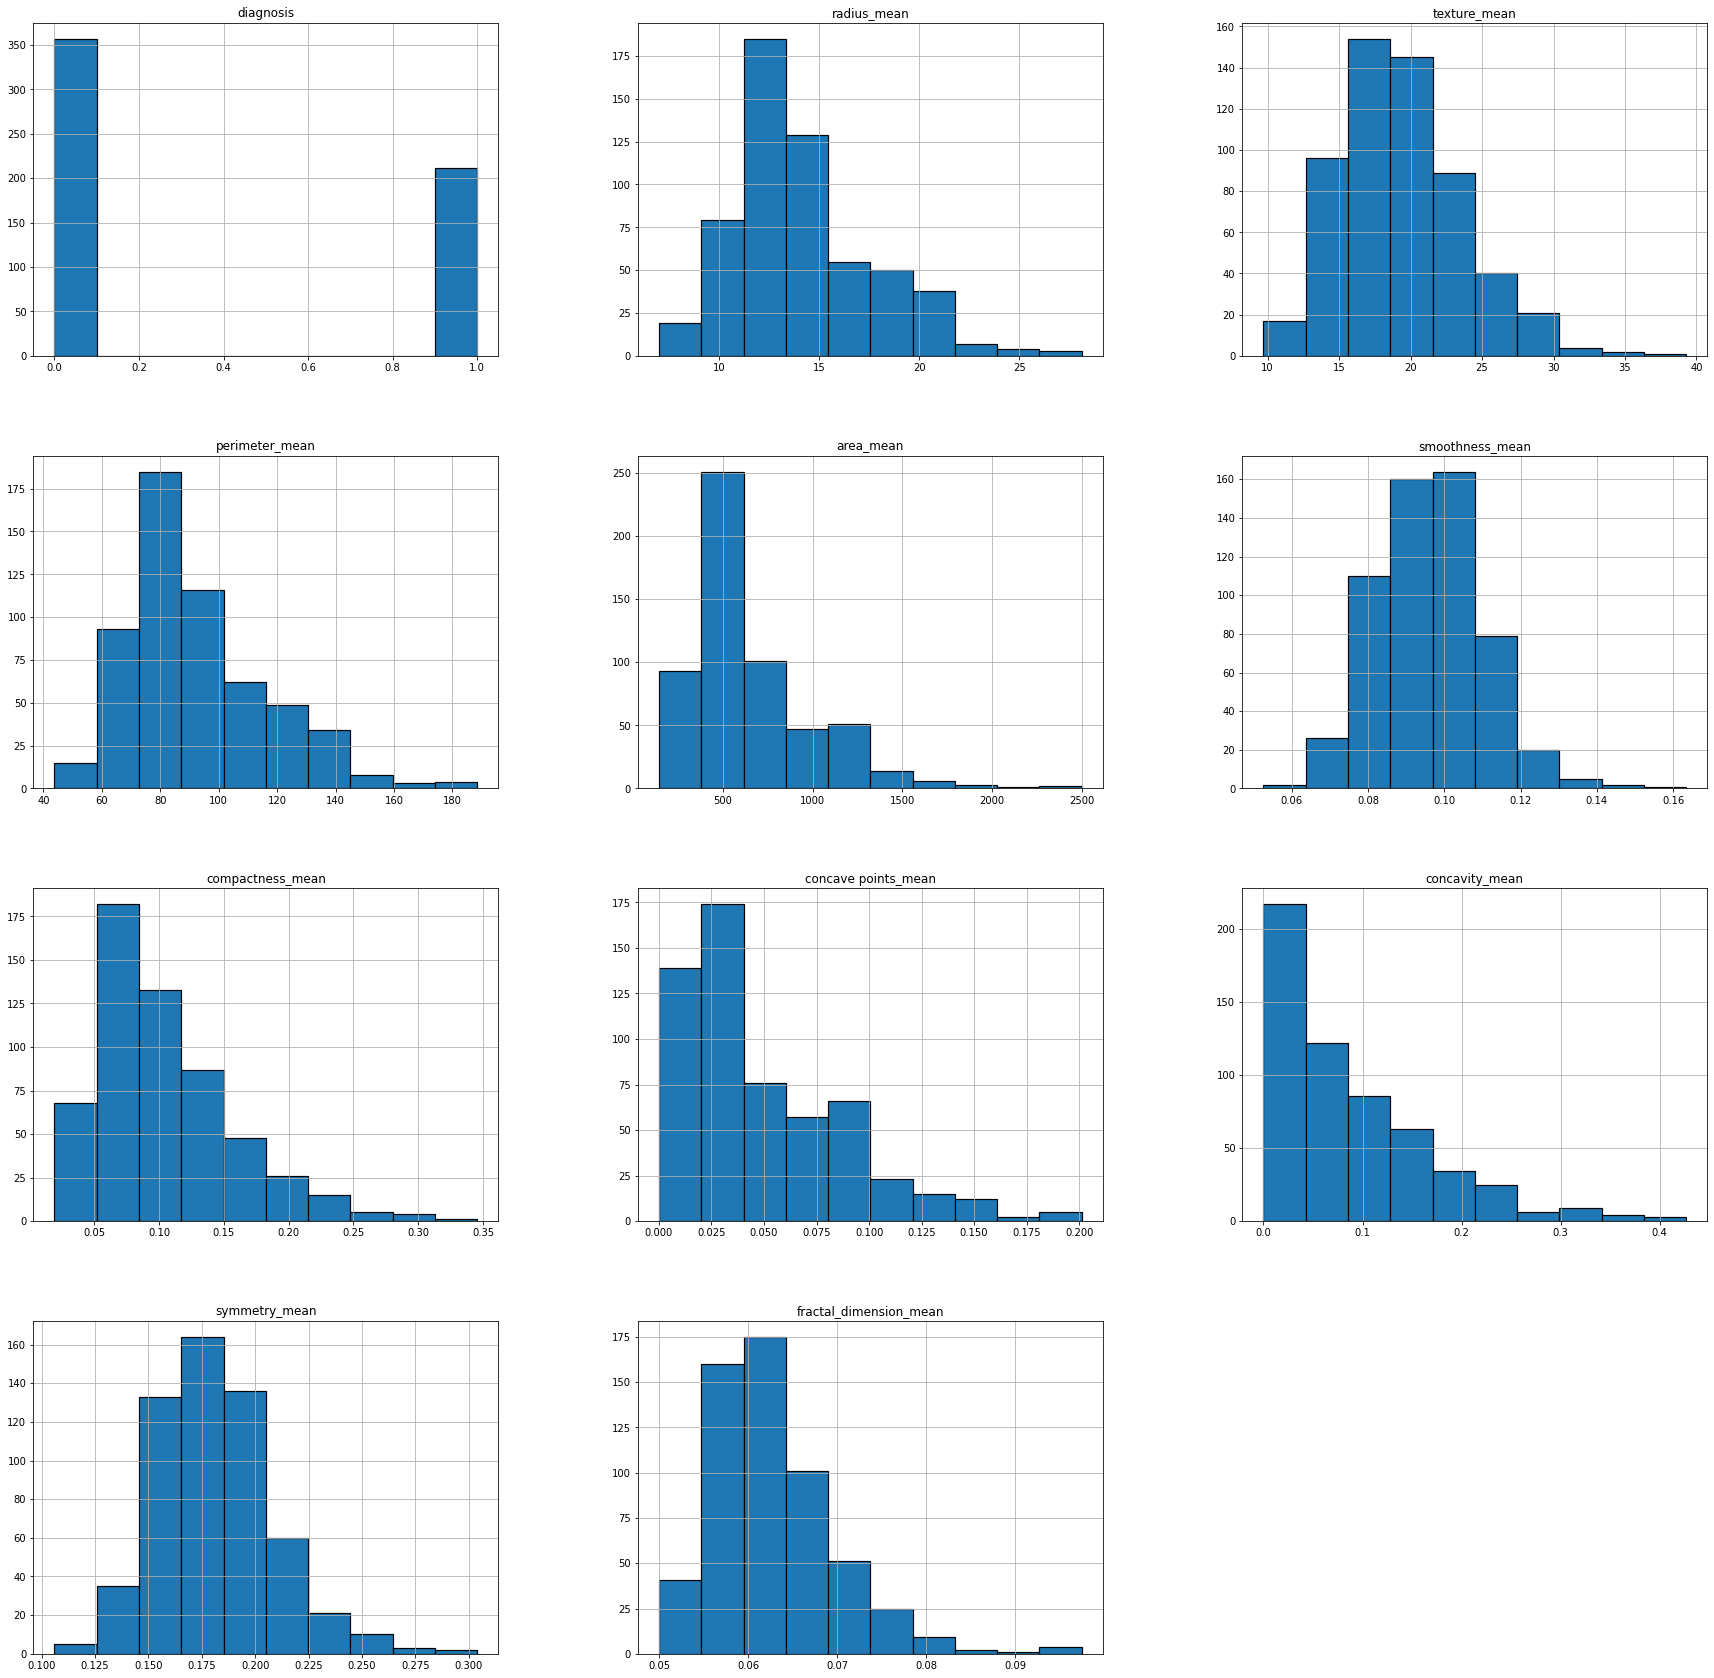

In [ ]:
mean.hist(edgecolor = 'black', linewidth = 1.2)
fig = plt.gcf()
fig.set_size_inches(30,30)
plt.show()

# Split dataset for test and train

In [ ]:
train, test = train_test_split(mean, test_size = 0.3)
print(train.shape)
print(test.shape)

(398, 11)
(171, 11)


In [ ]:
train_X = train[['radius_mean','perimeter_mean','area_mean','compactness_mean','concave points_mean']]
train_y = train.diagnosis

test_X = test[['radius_mean','perimeter_mean', 'area_mean','compactness_mean',"concave points_mean"]]
test_y = test.diagnosis


# Classification model

In [ ]:
#SVM
model = svm.SVC()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print("The Accuracy of SVM is: ",metrics.accuracy_score(prediction, test_y))
print("cross validation output:",cross_val_score(model,test_X,test_y, cv=3))

The Accuracy of SVM is:  0.9005847953216374
cross validation output: [0.92982456 0.80701754 0.98245614]


In [ ]:
#2. Logistic Regression

model1  = LogisticRegression()
model1.fit(train_X, train_y)
prediction1 = model1.predict(test_X)
print("The Accuracy of LR is: ",metrics.accuracy_score(prediction1, test_y))
print("cross validation output:",cross_val_score(model1,test_X,test_y, cv=3))

The Accuracy of LR is:  0.9239766081871345
cross validation output: [0.89473684 0.84210526 0.96491228]


In [ ]:
#3. Decision Tree - CART
model2 = DecisionTreeClassifier(criterion='entropy',random_state=0)
model2.fit(train_X, train_y)
prediction2 = model2.predict(test_X)
print("The Accuracy of DT is: ",metrics.accuracy_score(prediction2, test_y))
print("cross validation output:",cross_val_score(model2,test_X,test_y, cv=3))

The Accuracy of DT is:  0.9181286549707602
cross validation output: [0.87719298 0.84210526 0.92982456]


In [ ]:
# 4. KNN
model3 = KNeighborsClassifier(n_neighbors = 3)
model3.fit(train_X, train_y)
prediction3 = model3.predict(test_X)
print("The Accuracy of KNN is: ",metrics.accuracy_score(prediction3, test_y))
print("cross validation output:",cross_val_score(model3,test_X,test_y, cv=3))

The Accuracy of KNN is:  0.8888888888888888
cross validation output: [0.9122807  0.80701754 0.96491228]


In [ ]:
#Ramdom forest model
model4 = RandomForestClassifier(n_estimators=100,min_samples_split=25, max_depth=7, max_features=2,criterion='entropy',random_state=0)
model4.fit(train_X, train_y)
prediction4 = model4.predict(test_X)
print("The Accuracy of randomForest is: ",metrics.accuracy_score(prediction4, test_y))
print("cross validation output:",cross_val_score(model4,test_X,test_y, cv=5))

The Accuracy of randomForest is:  0.9649122807017544
cross validation output: [0.91428571 0.91176471 0.82352941 0.94117647 0.97058824]


# Conclusion

The best model to be used for diagnosing breast cancer as found in this analysis is the Random Forest model with the top 5 predictors, 'concave points_mean','area_mean','radius_mean','perimeter_mean','concavity_mean'. It gives a prediction accuracy of ~95% and a cross-validation score ~ 93% for the test data set.

# Another method

In [ ]:
x=cancer.iloc[:,1:31].values
Y=cancer.iloc[:,0].values


In [ ]:
x1_train,x1_test,Y1_train,Y1_test=train_test_split(x,Y,test_size=0.25,random_state=0)
print(x.shape,x1_train.shape,x1_test.shape)

(569, 30) (426, 30) (143, 30)


In [ ]:
x1_train

array([[ 11.85   ,  17.46   ,  75.54   , ...,   0.0914 ,   0.3101 ,
          0.07007],
       [ 11.22   ,  19.86   ,  71.94   , ...,   0.02022,   0.3292 ,
          0.06522],
       [ 20.13   ,  28.25   , 131.2    , ...,   0.1628 ,   0.2572 ,
          0.06637],
       ...,
       [  9.436  ,  18.32   ,  59.82   , ...,   0.05052,   0.2454 ,
          0.08136],
       [  9.72   ,  18.22   ,  60.73   , ...,   0.     ,   0.1909 ,
          0.06559],
       [ 11.51   ,  23.93   ,  74.52   , ...,   0.09653,   0.2112 ,
          0.08732]])

In [ ]:
#feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x1_train=sc.fit_transform(x1_train)
x1_test=sc.transform(x1_test)

In [ ]:
#Creating a function for the models
def models(x1_train,y1_train):
  #logistic regression
  from sklearn.linear_model import LogisticRegression
  log=LogisticRegression()
  log.fit(x1_train,Y1_train)

  #Decision Tree
  from sklearn.tree import DecisionTreeClassifier
  tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
  tree.fit(x1_train,Y1_train)

  #Random forest
  from sklearn.ensemble import RandomForestClassifier
  forest=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
  forest.fit(x1_train,Y1_train)
  #SVM
  from sklearn.svm import SVC # "Support vector classifier"  
  svc = SVC()   
  svc.fit(x1_train, Y1_train) 
  y_pred= svc.predict(x1_test)

  #printing the accurancy on the training data
  print("[1]. LR Training Accuracy:",log.score(x1_train,Y1_train))
  print("[2]. DT Training Accuracy:",tree.score(x1_train,Y1_train))
  print("[3]. RF Training Accuracy:",forest.score(x1_train,Y1_train))
  print("[4]. SVM Training Accuracy:",svc.score(x1_train,Y1_train))

  return log,tree,forest,svc


In [ ]:
model=models(x1_train,Y1_train)

[1]. LR Training Accuracy: 0.9906103286384976
[2]. DT Training Accuracy: 1.0
[3]. RF Training Accuracy: 0.9976525821596244
[4]. SVM Training Accuracy: 0.9859154929577465


# OBSERVATION:
In this above dataset of cancer data .By increasing number of datas into  the data set accuracy also get increased

Mainly desition tree and Random forest model gives more accuracy